# Install library

In [22]:
# !pip install -U sentence-transformers
# !pip install transformers
# !pip install gdown
# !pip install pandas
# !pip install tqdm
# !pip install numpy
# !pip install seaborn
!pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 53.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 37.6 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183.3 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 35.7 MB/s eta 0:00:00


In [3]:
!mkdir data
!gdown --id 1-6djK3NYWpSH0CGUOvAMrFhv9yyzUYmc

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1-6djK3NYWpSH0CGUOvAMrFhv9yyzUYmc
From (redirected): https://drive.google.com/uc?id=1-6djK3NYWpSH0CGUOvAMrFhv9yyzUYmc&confirm=t&uuid=f86f7a01-a6dc-4065-98a5-7b1242bf24ef
To: /workspace/training_data_final.csv
100%|██████████████████████████████████████| 1.08G/1.08G [00:24<00:00, 44.3MB/s]


In [4]:
!mv /workspace/training_data_final.csv /workspace/data

In [5]:
!gdown --id 1-H0SDShzmkUaJyuhe9jFMzeD08KqINwN

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1-H0SDShzmkUaJyuhe9jFMzeD08KqINwN
From (redirected): https://drive.google.com/uc?id=1-H0SDShzmkUaJyuhe9jFMzeD08KqINwN&confirm=t&uuid=538e7901-477d-49d4-bcdc-fd7b7ed1f692
To: /workspace/df_train_zalo_60k_v3.csv
100%|████████████████████████████████████████| 516M/516M [00:05<00:00, 89.4MB/s]


In [7]:
!gdown --id 1UidNRusCqwrE5zAnACyAMlk9Kn6gBWII

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UidNRusCqwrE5zAnACyAMlk9Kn6gBWII
To: /workspace/Bản sao của train.csv
100%|██████████████████████████████████████| 56.4M/56.4M [00:01<00:00, 37.1MB/s]


# Import lib

In [1]:
from sentence_transformers import SentenceTransformer, models, InputExample, losses, LoggingHandler
from torch.utils.data import DataLoader
import pickle
from sentence_transformers import evaluation
import logging
from tqdm import tqdm

In [2]:
logging.basicConfig(format='%(asctime)s - %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S',
                        level=logging.INFO,
                        handlers=[LoggingHandler()])

In [12]:
word_embedding_model = models.Transformer("vinai/phobert-large", max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

2023-11-17 20:36:13 - Use pytorch device: cuda


In [13]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [14]:
!nvidia-smi

Fri Nov 17 20:36:13 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:C1:00.0 Off |                  Off |
| 30%   30C    P8              33W / 450W |      5MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
import logging
import os
import csv
import numpy as np
from typing import List, Union
import math
from tqdm.autonotebook import trange

import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter

logger = logging.getLogger(__name__)


class LossEvaluator(evaluation.BinaryClassificationEvaluator):

    def __init__(self, loader, loss_model: nn.Module = None, name: str = '', log_dir: str = None,
                 show_progress_bar: bool = False, write_csv: bool = True):

        """
        Evaluate a model based on the loss function.
        The returned score is loss value.
        The results are written in a CSV and Tensorboard logs.
        :param loader: Data loader object
        :param loss_model: loss module object
        :param name: Name for the output
        :param log_dir: path for tensorboard logs 
        :param show_progress_bar: If true, prints a progress bar
        :param write_csv: Write results to a CSV file
        """

        self.loader = loader
        self.write_csv = write_csv
        self.logs_writer = SummaryWriter(log_dir=log_dir)
        self.name = name
        self.loss_model = loss_model

        # move model to gpu:  lidija-jovanovska
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        loss_model.to(self.device)

        if show_progress_bar is None:
            show_progress_bar = (
                    logger.getEffectiveLevel() == logging.INFO or logger.getEffectiveLevel() == logging.DEBUG)
        self.show_progress_bar = show_progress_bar

        self.csv_file = "loss_evaluation" + ("_" + name if name else '') + "_results.csv"
        self.csv_headers = ["epoch", "steps", "loss"]

    def __call__(self, model, output_path: str = None, epoch: int = -1, steps: int = -1) -> float:

        self.loss_model.eval()

        loss_value = 0
        self.loader.collate_fn = model.smart_batching_collate
        num_batches = len(self.loader)
        data_iterator = iter(self.loader)

        with torch.no_grad():
            for _ in trange(num_batches, desc="Iteration", smoothing=0.05, disable=not self.show_progress_bar):
                sentence_features, labels = next(data_iterator)
                # move data to gpu
                for i in range(0, len(sentence_features)):
                    for key, value in sentence_features[i].items():
                        sentence_features[i][key] = sentence_features[i][key].to(self.device)
                labels = labels.to(self.device)
                loss_value += self.loss_model(sentence_features, labels).item()

        final_loss = loss_value / num_batches
        if output_path is not None and self.write_csv:

            csv_path = os.path.join(output_path, self.csv_file)
            output_file_exists = os.path.isfile(csv_path)

            with open(csv_path, newline='', mode="a" if output_file_exists else 'w', encoding="utf-8") as f:
                writer = csv.writer(f)
                if not output_file_exists:
                    writer.writerow(self.csv_headers)

                writer.writerow([epoch, steps, final_loss])

            # ...log the running loss
            self.logs_writer.add_scalar('val_loss',
                                        final_loss,
                                        steps)

        self.loss_model.zero_grad()
        self.loss_model.train()

        return final_loss

# Load data

In [16]:
import pandas as pd
df_train = pd.read_csv("train.csv", index_col=0)

In [17]:
import numpy as np
df_train['label'] = df_train['label'].astype(np.int16)
df_train

,question_id,question,law_id,article_id,title,text,label,answer
0,265ce56261d870890baa8cce75308128,"Việc cấp lại, cấp bổ sung Sổ nhật ký đoàn than...",05/2014/tt-ttcp,30,Điều 30. Chuyển hồ sơ sang cơ quan điều tra,Trong trường hợp người ra quyết định thanh tra...,0,điều 30 chuyển hồ sơ sang cơ quan điều tra tro...
1,c139de149a1a91dcbe97207bb02b632b,Chủ đầu tư có trách nhiệm gì khi lập hồ sơ sự ...,06/2021/nđ-cp,18,Điều 18. Quản lý tiến độ thi công xây dựng,1. Công trình xây dựng trước khi triển khai th...,0,điều 18 quản lý tiến độ thi công xây dựng 1 cô...
2,1a509e547c54a745cfa1fa7976eae6d0,"Tài liệu khai thác cảng hàng không, sân bay gồ...",05/2021/nđ-cp,24,Điều 24. Thẩm quyền thẩm định quy hoạch cảng h...,Cơ quan tổ chức lập quy hoạch thành lập Hội đồ...,0,điều 24 thẩm quyền thẩm định quy hoạch cảng hà...
3,abd89b51adc3d278b908e6871a86a573,Doanh nghiệp trong khu công nghiệp có được đăn...,32/2014/tt-blđtbxh,4,Điều 4. Nguyên tắc ủy quyền,1. Đảm bảo hiệu quả công tác quản lý nhà nước ...,0,điều 4 nguyên tắc ủy quyền 1 đảm bảo hiệu quả ...
4,cdbdcb3d7d813c52e2c8553165a8e4df,Công ty đại chúng phát hành quyền mua cổ phần ...,155/2020/nđ-cp,53,Điều 53. Điều kiện công ty đại chúng phát hành...,Công ty đại chúng phát hành cổ phiếu để hoán đ...,0,điều 53 điều kiện công ty đại chúng phát hành ...
...,...,...,...,...,...,...,...,...
8889,94ae502e5bf5a3befe8098db04624096,Xây dựng lò gạch cách chỉ giới hành lang an to...,100/2019/nđ-cp,3,Điều 3. Giải thích từ ngữ,"Trong Nghị định này, các từ ngữ dưới đây được ...",0,điều 3 giải thích từ ngữ trong nghị định này c...
8890,817afb853f193ffe938887d569675cf0,"Kiểm tra nhà nước về chất lượng sản phẩm, hàng...",26/2018/tt-blđtbxh,3,Điều 3. Kiểm tra nhà nước về chất lượng sản ph...,1. Hoạt động kiểm tra nhà nước về chất lượng s...,1,điều 3 kiểm tra nhà nước về chất lượng sản phẩ...
8891,a6f164cc19e193abe5f0323c807081be,Ứng dụng công nghệ thông tin trong việc cung c...,13/2018/nđ-cp,10,Điều 10. Ứng dụng công nghệ thông tin trong vi...,1. Người đứng đầu cơ quan cung cấp thông tin b...,1,điều 10 ứng dụng công nghệ thông tin trong việ...
8892,7e9a91a8b157ead81059304ae538cc04,Thời gian xét tha tù trước thời hạn áp dụng từ...,41/2019/qh14,57,Điều 57. Thời điểm xét tha tù trước thời hạn c...,Việc xét tha tù trước thời hạn có điều kiện đư...,1,điều 57 thời điểm xét tha tù trước thời hạn có...


In [18]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/tmp/ipykernel_2677/1383614074.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [19]:
import re
def process(text):
    text = str(text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'AT_ABC', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'([\w]+\) )', '.', text)
    text = re.sub(r'([\d]+\. )', '', text)
    text = re.sub(r'[^aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0-9., ]', '', text)
    text = text.replace('.', '. ')
    text = text.replace(' .', '. ')
    text = re.sub(r'[\s]+', ' ', text)
    text = text.strip('.')
    text = text.strip('\'"')
    text = text.strip()
    text = text.lower()
    return text

# df_train['question'] = df_train['question'].progress_apply(process)
# df_train['answer'] = df_train['answer'].progress_apply(process)

In [20]:
def check_err(text):
  if len(str(text).split(' ')) < 5:
    return True
  return False

In [21]:
def check_err(text):
  if len(str(text).split(' ')) < 5:
    return True
  return False
df_train['error'] = df_train['question'].progress_apply(check_err)
df_train = df_train[df_train['error']==False]
df_train['error'] = df_train['answer'].progress_apply(check_err)
df_train = df_train[df_train['error']==False]

  0%|          | 0/8894 [00:00<?, ?it/s]

  0%|          | 0/8885 [00:00<?, ?it/s]

/tmp/ipykernel_2677/2231701591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['error'] = df_train['answer'].progress_apply(check_err)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    df_train[['question', 'answer']], df_train['label'],
    test_size=0.2, random_state=42
)


In [6]:
# recheck data
X_train['label'] = y_train
X_val['label'] = y_val
X_train.head()

,question,answer,label
76836,em nghỉ làm trong thời gian thử việc của một c...,bộ luật lao động hiện hành có quy định rõ ràng...,1
14078,Điều kiện cấp Giấy chứng nhận đủ điều kiện kin...,hồ sơ làm căn cứ để đánh giá đáp ứng thực hành...,0
88253,xin cho tôi hỏi vỉa hè trong đô thị có được co...,căn cứ pháp lý nghị định 1002013nđcp nghị định...,1
75047,tư vấn trường hợp điều chỉnh lương hưu,căn cứ điều 2 nghị định 552016nđcp quy định đố...,1
48309,"Hoạt động kinh doanh của doanh nghiệp, hợp tác...",đình chỉ tiến hành thủ tục phá sản. kể từ ngày...,0


label
0    13180
1     9907
Name: count, dtype: int64


<Axes: xlabel='label'>

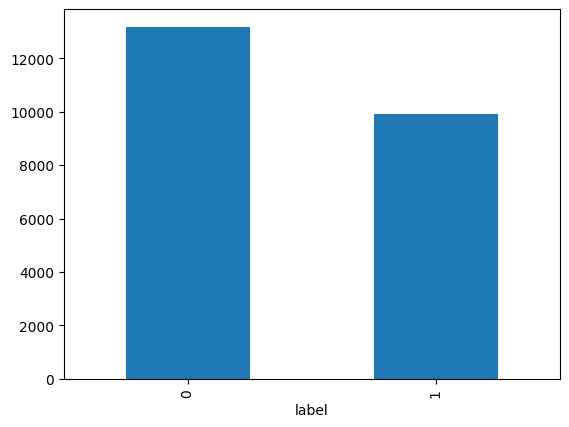

In [7]:
import seaborn as sns

type_counts = X_val['label'].value_counts()
print(type_counts)
type_counts.plot(kind='bar')

In [8]:
train_examples = []
sent1 = []
sent2 = []
scores = []

In [9]:
val_examples = []

In [10]:
from tqdm import tqdm

for row in tqdm(X_train.itertuples()):
  # print(row.question)
  # print("------------")
  relevant = float(row.label)
  question = row.question
  answer = row.answer
  example = InputExample(texts=[question, answer], label=relevant)
  train_examples.append(example)

for row in tqdm(X_val.itertuples()):
  # print(row.question)
  # print("------------")
  relevant = float(row.label)
  question = row.question
  answer = row.answer
  example = InputExample(texts=[question, answer], label=relevant)
  val_examples.append(example)

92347it [00:00, 153450.47it/s]
23087it [00:00, 424659.78it/s]


In [17]:
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
val_dataloader = DataLoader(val_examples, batch_size=16)
train_loss = losses.ContrastiveLoss(model)


In [18]:
X_val

,question,answer,label
83628,chào chuyên gia. em tên toản em có một câu hỏi...,căn cứ pháp lý luật nghĩa vụ quân sự 2015 thôn...,1
100137,tổ chức chương trình văn nghệ thuê một nhà hát...,căn cứ pháp lý nghị định 1032009nđcp nghị định...,1
22729,Người lao động nước ngoài không thuộc diện cấp...,các trường hợp người lao động nước ngoài không...,0
68220,thương thảo hợp đồng rồi phê duyệt kết quả lựa...,tại khoản 3 điều 38 luật đấu thầu 2013 có quy ...,1
89972,"chuyển đổi mục đích sử dụng đất điều kiện, hồ ...",đất đai là thành phần quan trọng hàng đầu của ...,1
...,...,...,...
26561,Hồ sơ đăng ký xe đối với xe nguồn gốc tịch thu...,"giải quyết một số trường hợp khi đăng ký, cấp ...",0
72459,liệt sĩ có được miễn thuế sử dụng đất không,về việc miễn thuế nhà đất hàng năm pháp luật c...,1
81681,xử phạt vi phạm không có kế hoạch bảo vệ môi t...,cơ sở pháp lý luật bảo vệ môi trường năm 2014 ...,1
51760,Để súc vật kéo xe mà không có người điều khiển...,"xử phạt người đua xe trái phép, cổ vũ đua xe t...",0


In [23]:
evaluator = evaluation.BinaryClassificationEvaluator(X_val['question'].values.tolist(),
                                                     X_val['answer'].values.tolist(),
                                                     X_val['label'].values.tolist())
tensorboard_evaluator = LossEvaluator(val_dataloader, loss_model=train_loss, log_dir='logs/', name='train')

In [37]:
!mkdir output

In [20]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [24]:
model.fit(train_objectives=[(train_dataloader, train_loss)],
            epochs=10,
            warmup_steps=1000,
            optimizer_params={'lr': 1e-5},
            save_best_model=True,
            evaluator=tensorboard_evaluator,
            evaluation_steps=50,
            output_path='output/',
            use_amp=True,
            show_progress_bar=True)

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5772 [00:00<?, ?it/s]

2023-11-17 20:43:52 - Save model to output/


KeyboardInterrupt: 

In [20]:
model.evaluate(evaluator)

2023-11-17 13:00:01 - Binary Accuracy Evaluation of the model on  dataset:
2023-11-17 13:01:48 - Accuracy with Cosine-Similarity:           86.51	(Threshold: 0.9898)
2023-11-17 13:01:48 - F1 with Cosine-Similarity:                 70.44	(Threshold: 0.9871)
2023-11-17 13:01:48 - Precision with Cosine-Similarity:          75.04
2023-11-17 13:01:48 - Recall with Cosine-Similarity:             66.37
2023-11-17 13:01:48 - Average Precision with Cosine-Similarity:  78.21

2023-11-17 13:01:48 - Accuracy with Manhattan-Distance:           86.34	(Threshold: 14.7568)
2023-11-17 13:01:48 - F1 with Manhattan-Distance:                 70.11	(Threshold: 16.7393)
2023-11-17 13:01:48 - Precision with Manhattan-Distance:          73.89
2023-11-17 13:01:48 - Recall with Manhattan-Distance:             66.69
2023-11-17 13:01:48 - Average Precision with Manhattan-Distance:  77.30

2023-11-17 13:01:48 - Accuracy with Euclidean-Distance:           86.36	(Threshold: 0.5772)
2023-11-17 13:01:48 - F1 with Eucl

0.7821118080662481

# Benchmark

In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, InputExample, losses, LoggingHandler
from torch.utils.data import DataLoader
import pickle
from sentence_transformers import evaluation
import logging
from tqdm import tqdm

import re
def process(text):
    text = str(text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'AT_ABC', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'([\w]+\) )', '.', text)
    text = re.sub(r'([\d]+\. )', '', text)
    text = re.sub(r'[^aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0-9., ]', '', text)
    text = text.replace('.', '. ')
    text = text.replace(' .', '. ')
    text = re.sub(r'[\s]+', ' ', text)
    text = text.strip('.')
    text = text.strip('\'"')
    text = text.strip()
    text = text.lower()
    return text

df_test = pd.read_csv("test.csv")
df_test['label'] = df_test['label'].astype(np.int16)

In [3]:
evaluator = evaluation.BinaryClassificationEvaluator(df_test['question'].apply(process).values.tolist(),
                                                     df_test['combine'].values.tolist(),
                                                     df_test['label'].values.tolist())

In [6]:
# phobert-large

word_embedding_model = models.Transformer("vinai/phobert-large", max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])
model.evaluate(evaluator)

0.4696954546016417

In [7]:
# phobert-large finetuned

# word_embedding_model = models.Transformer("output2/", max_seq_length=256)
# pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer("output/")
model.evaluate(evaluator)

0.35896102084691295

# Hard negative mining

In [13]:
model = SentenceTransformer("output2/")
model.max_seq_length = 256
# model.evaluate(evaluator)

In [14]:
#download corpus
!gdown --id 1lhU83Lvhcf_qKAAQeuqRVrJTPIeCdGos

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lhU83Lvhcf_qKAAQeuqRVrJTPIeCdGos
From (redirected): https://drive.google.com/uc?id=1lhU83Lvhcf_qKAAQeuqRVrJTPIeCdGos&confirm=t&uuid=feedab1d-45a3-46d0-96a5-466b7fbd8949
To: /workspace/final_data_minimize.csv
100%|████████████████████████████████████████| 785M/785M [00:18<00:00, 43.0MB/s]


In [14]:
df_corpus = pd.read_csv("final_data_minimize.csv",index_col=0)
df_corpus.head()

,law_id,article_id,combine
0,hpks0,0.0,nước cộng hòa xã hội chủ nghĩa việt nam là một...
1,hpks0,1.0,1. nhà nước cộng hòa xã hội chủ nghĩa việt nam...
2,hpks0,2.0,nhà nước bảo đảm và phát huy quyền làm chủ của...
3,hpks0,3.0,1. đảng cộng sản việt nam - đội tiên phong của...
4,hpks0,4.0,1. nước cộng hòa xã hội chủ nghĩa việt nam là ...


In [22]:
df_train = df_train[df_train['label'] == True]
df_train = df_train.reset_index(drop=True)
df_train

,question_id,question,law_id,article_id,title,text,label,answer,error
0,bb82be461b978c0189ee05a9091a360d,Mức phạt khi điều khiển xe ô tô gây tai nạn gi...,100/2019/nđ-cp,5,Điều 5. Xử phạt người điều khiển xe ô tô và cá...,1. Phạt tiền từ 200.000 đồng đến 400.000 đồng ...,1,điều 5 xử phạt người điều khiển xe ô tô và các...,False
1,56c5e4878ccc8d5983b6113c3d8c46e6,Có được giữ người trong trường hợp khẩn cấp kh...,101/2015/qh13,110,Điều 110. Giữ người trong trường hợp khẩn cấp,1. Khi thuộc một trong các trường hợp khẩn cấp...,1,điều 110 giữ người trong trường hợp khẩn cấp 1...,False
2,5884b3dd468ad6d31dbd21feb4a34b26,Điều chỉnh nội dung của bản công bố sử dụng dấ...,21/2014/tt-bkhcn,14,Điều 14. Điều chỉnh nội dung của bản công bố,1. Khi có bất kỳ sự thay đổi nào về nội dung c...,1,điều 14 điều chỉnh nội dung của bản công bố 1 ...,False
3,5e734e6b03c656aa79b4b01868accff2,Công trình đường ngang gồm các hạng mục công t...,06/2019/tt-bgtvt,3,Điều 3. Giải thích từ ngữ,"Trong Thông tư này, các từ ngữ dưới đây được h...",1,điều 3 giải thích từ ngữ trong thông tư này cá...,False
4,e770446cac430f486f286e20d565b226,Mức phạt khi điều khiển xe ô tô đẩy xe khác là...,100/2019/nđ-cp,5,Điều 5. Xử phạt người điều khiển xe ô tô và cá...,1. Phạt tiền từ 200.000 đồng đến 400.000 đồng ...,1,điều 5 xử phạt người điều khiển xe ô tô và các...,False
...,...,...,...,...,...,...,...,...,...
2956,cae7fbfa74f57e66bd03fa8a0b801776,Cơ quan quản lý nhà nước về khuyến nông có trá...,83/2018/nđ-cp,31,"Điều 31. Xã hội hóa khuyến nông, chuyển giao c...","1. Các tổ chức, cá nhân tham gia xã hội hóa ho...",1,điều 31 xã hội hóa khuyến nông chuyển giao côn...,False
2957,1d90be38e175b86802cc690ad15f9784,Mức phạt đối với hành vi điều khiển xe ô tô ki...,100/2019/nđ-cp,16,Điều 16. Xử phạt người điều khiển xe ô tô (bao...,1. Phạt tiền từ 100.000 đồng đến 200.000 đồng ...,1,điều 16 xử phạt người điều khiển xe ô tô bao g...,False
2958,817afb853f193ffe938887d569675cf0,"Kiểm tra nhà nước về chất lượng sản phẩm, hàng...",26/2018/tt-blđtbxh,3,Điều 3. Kiểm tra nhà nước về chất lượng sản ph...,1. Hoạt động kiểm tra nhà nước về chất lượng s...,1,điều 3 kiểm tra nhà nước về chất lượng sản phẩ...,False
2959,a6f164cc19e193abe5f0323c807081be,Ứng dụng công nghệ thông tin trong việc cung c...,13/2018/nđ-cp,10,Điều 10. Ứng dụng công nghệ thông tin trong vi...,1. Người đứng đầu cơ quan cung cấp thông tin b...,1,điều 10 ứng dụng công nghệ thông tin trong việ...,False


In [23]:
pred_list = []
top_k = 3
save_pairs = []

In [ ]:
# embed training data
corpus_embed_matrix = model.encode(df_corpus['combine'], show_progress_bar=True, batch_size=256)

Batches:   0%|          | 0/1826 [00:00<?, ?it/s]

In [ ]:
question_embed_matrix = model.encode(df_train['question'], show_progress_bar=True, batch_size=256)

In [32]:
matrix_emb = torch.tensor(corpus_embed_matrix)
matrix_emb

tensor([[ 0.0682, -0.0955,  0.0554,  ...,  0.0823, -0.1375, -0.0973],
        [ 0.0485,  0.1695,  0.0587,  ...,  0.0022,  0.0102, -0.2565],
        [-0.0070,  0.1961,  0.1144,  ...,  0.0187,  0.0077, -0.4522],
        ...,
        [ 0.0496, -0.0342, -0.2484,  ..., -0.0281, -0.0891, -0.6480],
        [ 0.1108,  0.0677, -0.2409,  ..., -0.0159,  0.1546, -0.4919],
        [-0.1066, -0.2335,  0.1093,  ..., -0.1453, -0.2565, -0.0725]])

In [55]:
# matrix_emb[0].numpy().squeeze()
pickle.dump(matrix_emb, open("corpus_emb.sav", "wb"))
pickle.dump(question_embed_matrix, open("question_emb.sav", "wb"))

In [14]:
matrix_emb = pickle.load(open("corpus_emb.sav","rb"))

In [27]:
import torch


In [31]:
q_sample = model.encode(df_train.iloc[0]['question'], show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
all_cosine = util.cos_sim(q_sample, matrix_emb).numpy().squeeze(0)
all_cosine

array([0.8654549 , 0.41237426, 0.42421275, ..., 0.40430874, 0.4271445 ,
       0.50812286], dtype=float32)

In [37]:
predictions = np.argpartition(all_cosine, len(all_cosine) - 10)[-10:]
predictions

array([359193, 194458, 426917,  18950, 206726, 255684,  30266, 154902,
       385753,  83116])

In [52]:
all_cosine[predictions]

array([0.97035193, 0.9706627 , 0.97112644, 0.9710062 , 0.9711537 ,
       0.97325945, 0.9722441 , 0.9784419 , 0.9729058 , 0.9771466 ],
      dtype=float32)

In [70]:
list_new_pair = []

In [71]:
df_train

,question,answer,label,error
0,em buôn bán thuốc lá có một số hàng xuất xứ nư...,"hành vi sản xuất, buôn bán, vận chuyển, tàng t...",1,False
1,"thủ tục tách khẩu, nhập khẩu và đăng ký lại kh...",xác định nội dung đăng ký lại khai sinh trường...,1,False
2,"xin chào hệ thống pháp luật tôi muốn hỏi, cháu...",xác định nội dung đăng ký lại khai sinh trường...,1,False
3,mức phạt khi vi phạm về sử dụng lao động chưa ...,vi phạm quy định về lao động chưa thành niên. ...,1,False
4,thủ tục hưởng trợ cấp thờ cúng liệt sỹ,trợ cấp thờ cúng liệt sĩ. liệt sĩ không còn ng...,1,False
...,...,...,...,...
53466,sổ đỏ nhà tôi được cấp năm 2004 cho hộ gia đìn...,điều 179 luật đất đai 2013 quy định hộ gia đìn...,1,False
53467,có được thế chấp tài sản thừa kế không ngân hà...,"trong trường hợp của bạn, bố mẹ bạn đã lập di ...",1,False
53468,bố mẹ tôi lập di chúc chung để lại tài sản là ...,"trong trường hợp của bạn, bố mẹ bạn đã lập di ...",1,False
53469,giao dịch vô hiệu khi bị cưỡng ép ký kết hợp đ...,hợp đồng vay tài sản là sự thoả thuận giữa các...,1,False


In [18]:
from tqdm import tqdm
from sentence_transformers import util
import numpy as np

In [46]:
list_new_pair = []

In [29]:
util.cos_sim(question_embed_matrix[:512], matrix_emb)

tensor([[0.8655, 0.4124, 0.4242,  ..., 0.4043, 0.4271, 0.5081],
        [0.8426, 0.4038, 0.4636,  ..., 0.3966, 0.4401, 0.4847],
        [0.8471, 0.3888, 0.4354,  ..., 0.3698, 0.4201, 0.4507],
        ...,
        [0.8565, 0.4214, 0.4489,  ..., 0.3907, 0.4454, 0.4666],
        [0.8453, 0.4269, 0.4624,  ..., 0.4086, 0.4555, 0.4874],
        [0.8626, 0.4643, 0.5078,  ..., 0.4617, 0.4799, 0.5256]])

In [30]:
np.arange(0, len(question_embed_matrix), step=512)

array([    0,   512,  1024,  1536,  2048,  2560,  3072,  3584,  4096,
        4608,  5120,  5632,  6144,  6656,  7168,  7680,  8192,  8704,
        9216,  9728, 10240, 10752, 11264, 11776, 12288, 12800, 13312,
       13824, 14336, 14848, 15360, 15872, 16384, 16896, 17408, 17920,
       18432, 18944, 19456, 19968, 20480, 20992, 21504, 22016, 22528,
       23040, 23552, 24064, 24576, 25088, 25600, 26112, 26624, 27136,
       27648, 28160, 28672, 29184, 29696, 30208, 30720, 31232, 31744,
       32256, 32768, 33280, 33792, 34304, 34816, 35328, 35840, 36352,
       36864, 37376, 37888, 38400, 38912, 39424, 39936, 40448, 40960,
       41472, 41984, 42496, 43008, 43520, 44032, 44544, 45056, 45568,
       46080, 46592, 47104, 47616, 48128, 48640, 49152, 49664, 50176,
       50688, 51200, 51712, 52224, 52736, 53248])

In [47]:
# create negative pair
for i in tqdm(np.arange(0, len(question_embed_matrix), step=1024)):
    items_all_cosine = util.cos_sim(question_embed_matrix[i:i+1024], matrix_emb).numpy()
    for jdx, cosine_score in enumerate(items_all_cosine):
        item_predictions = np.argpartition(cosine_score, len(cosine_score) - 3)[-3:]
        for k in item_predictions:
            list_new_pair.append({"question":df_train.iloc[jdx]['question'], "answer":df_corpus.iloc[k]['combine'], "label": False})
    

100%|██████████| 53/53 [05:50<00:00,  6.60s/it]


In [48]:
hard_negative_sample = pd.DataFrame.from_dict(list_new_pair)
hard_negative_sample

,question,answer,label
0,em buôn bán thuốc lá có một số hàng xuất xứ nư...,nghị quyết 63/nq- cp,False
1,em buôn bán thuốc lá có một số hàng xuất xứ nư...,- tất cả các loại thuốc dùng cho người đều phả...,False
2,em buôn bán thuốc lá có một số hàng xuất xứ nư...,nhãn thuốc thực hiện theo quy chế nhãn thuốc.,False
3,"thủ tục tách khẩu, nhập khẩu và đăng ký lại kh...",hình thức đăng ký 1. đăng ký chính thức. 2. đă...,False
4,"thủ tục tách khẩu, nhập khẩu và đăng ký lại kh...",4 thông báo về việc làm thủ tục xuất nhập khẩu...,False
...,...,...,...
160408,"kính chào luật sư, công ty tôi bị vướng vào vi...",1. hợp đồng bảo hiểm có thể được ký kết theo m...,False
160409,"kính chào luật sư, công ty tôi bị vướng vào vi...",thích hợp,False
160410,xử lý hóa đơn sử dụng trước khi thông báo phát...,"quyền, nghĩa vụ, trách nhiệm của các bên khi t...",False
160411,xử lý hóa đơn sử dụng trước khi thông báo phát...,khi nhận được đơn của nguyên đơn thì bị đơn có...,False


In [51]:
hard_negative_sample['label'] = hard_negative_sample['label'].astype(np.int16)
train_data_final_phase2 = pd.concat([hard_negative_sample, df_train], ignore_index=True)
train_data_final_phase2['error'] = False
train_data_final_phase2.to_csv("train_data_phase2.csv")

In [10]:
import pandas as pd
train_zalo = pd.read_csv("train.csv")
train_zalo = train_zalo.rename(columns={'combine':'answer'})
train_zalo.to_csv("train.csv")